In [2]:
import pandas as pd

# Load the datasets
cab_data_path = 'Cab_Data.csv'
city_data_path = 'City.csv'
customer_id_path = 'Customer_ID.csv'
transaction_id_path = 'Transaction_ID.csv'

cab_data = pd.read_csv(cab_data_path)
city_data = pd.read_csv(city_data_path)
customer_id_data = pd.read_csv(customer_id_path)
transaction_id_data = pd.read_csv(transaction_id_path)

# Quick inspection of the data
data_overview = {
    'Cab_Data': cab_data.head(),
    'City': city_data.head(),
    'Customer_ID': customer_id_data.head(),
    'Transaction_ID': transaction_id_data.head()
}

data_overview

{'Cab_Data':    Transaction ID  Date of Travel   Company        City  KM Travelled  \
 0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
 1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
 2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
 3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
 4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
 
    Price Charged  Cost of Trip  
 0         370.95       313.635  
 1         358.52       334.854  
 2         125.20        97.632  
 3         377.40       351.602  
 4         114.62        97.776  ,
 'City':              City   Population      Users
 0     NEW YORK NY   8,405,837    302,149 
 1      CHICAGO IL   1,955,130    164,468 
 2  LOS ANGELES CA   1,595,037    144,132 
 3        MIAMI FL   1,339,155     17,675 
 4  SILICON VALLEY   1,177,609     27,247 ,
 'Customer_ID':    Customer ID Gender  Age  Income (USD/Month)
 0     

In [3]:
# Preliminary data cleaning
# Checking for missing values
missing_values = {
    'Cab_Data': cab_data.isnull().sum(),
    'City': city_data.isnull().sum(),
    'Customer_ID': customer_id_data.isnull().sum(),
    'Transaction_ID': transaction_id_data.isnull().sum()
}

# Convert 'Date of Travel' in cab_data from Julian to Gregorian date
from datetime import datetime, timedelta
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit='D', origin='1899-12-30')

# Merging datasets
# Merging Cab_Data with Transaction_ID
cab_transaction_data = pd.merge(cab_data, transaction_id_data, on='Transaction ID')

# Merging the above with Customer_ID
cab_transaction_customer_data = pd.merge(cab_transaction_data, customer_id_data, on='Customer ID')

# Merging the combined data with City
final_data = pd.merge(cab_transaction_customer_data, city_data, left_on='City', right_on='City')

# Check for duplicates
final_data_duplicates = final_data.duplicated().sum()

# Data cleaning summary
data_cleaning_summary = {
    'Missing Values': missing_values,
    'Duplicates': final_data_duplicates
}

# Output the data cleaning summary for inspection
data_cleaning_summary


{'Missing Values': {'Cab_Data': Transaction ID    0
  Date of Travel    0
  Company           0
  City              0
  KM Travelled      0
  Price Charged     0
  Cost of Trip      0
  dtype: int64,
  'City': City          0
  Population    0
  Users         0
  dtype: int64,
  'Customer_ID': Customer ID           0
  Gender                0
  Age                   0
  Income (USD/Month)    0
  dtype: int64,
  'Transaction_ID': Transaction ID    0
  Customer ID       0
  Payment_Mode      0
  dtype: int64},
 'Duplicates': 0}

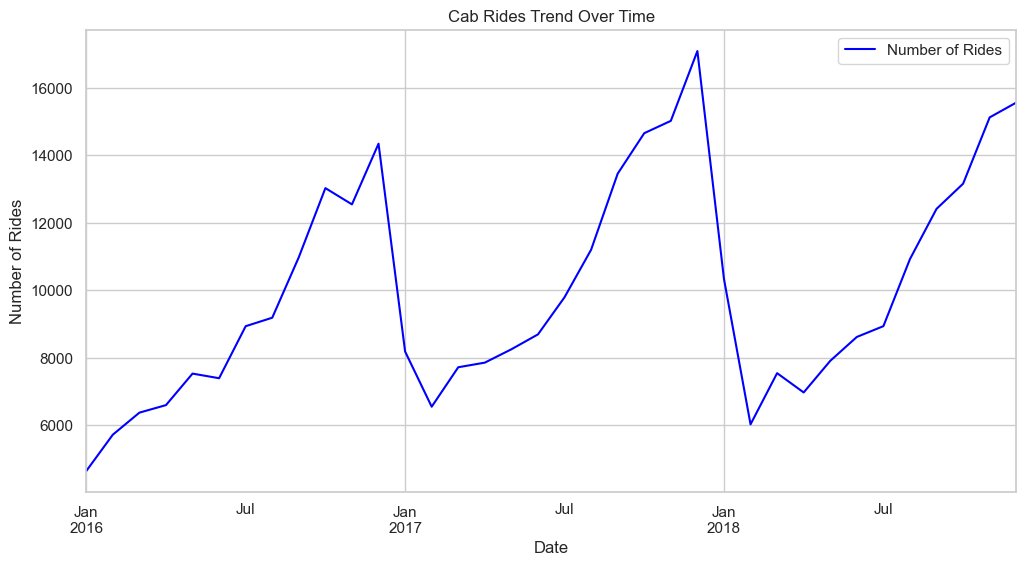

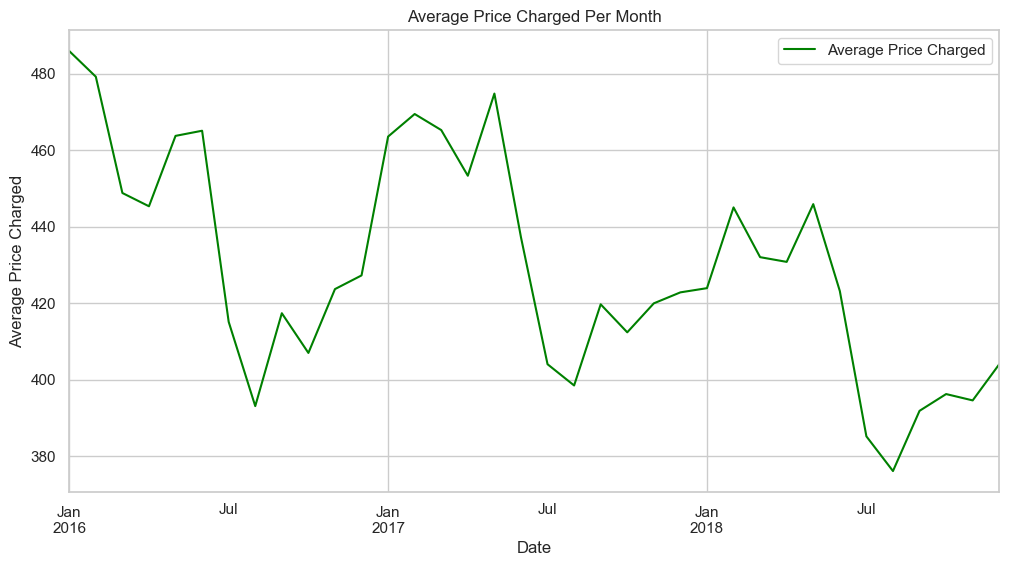

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

# Analyzing cab rides over time
plt.figure(figsize=(12, 6))
final_data.set_index('Date of Travel')['Price Charged'].resample('M').count().plot(label='Number of Rides', color='blue')
plt.title('Cab Rides Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

# Seasonal pattern exploration
plt.figure(figsize=(12, 6))
final_data.set_index('Date of Travel')['Price Charged'].resample('M').mean().plot(label='Average Price Charged', color='green')
plt.title('Average Price Charged Per Month')
plt.xlabel('Date')
plt.ylabel('Average Price Charged')
plt.legend()
plt.show()


In [5]:
# Performance comparison
company_grouped = final_data.groupby('Company').agg({'Price Charged': 'sum', 'Cost of Trip': 'sum', 'KM Travelled': 'sum', 'Transaction ID': 'count'}).rename(columns={'Transaction ID': 'Number of Rides'})
company_grouped['Profit'] = company_grouped['Price Charged'] - company_grouped['Cost of Trip']
company_grouped['Average Fare per KM'] = company_grouped['Price Charged'] / company_grouped['KM Travelled']
company_grouped.reset_index(inplace=True)

print(company_grouped)


      Company  Price Charged  Cost of Trip  KM Travelled  Number of Rides  \
0    Pink Cab   2.632825e+07  2.102092e+07    1911073.11            84711   
1  Yellow Cab   1.258539e+08  8.183351e+07    6199417.47           274681   

         Profit  Average Fare per KM  
0  5.307328e+06            13.776685  
1  4.402037e+07            20.300921  


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

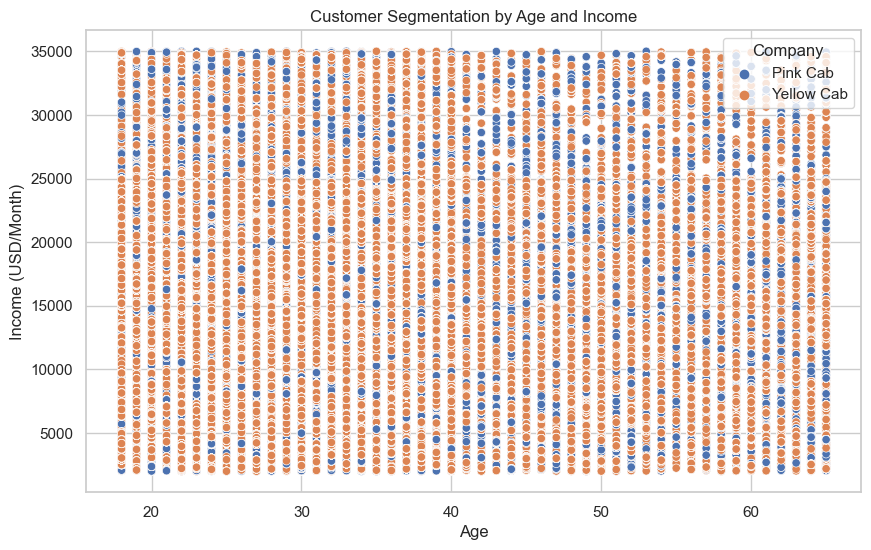

In [6]:
# Customer segmentation based on Age and Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Age', y='Income (USD/Month)', hue='Company')
plt.title('Customer Segmentation by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income (USD/Month)')
plt.show()


In [27]:
# Hypothesis 1: Which gender uses which cab more
rides_female_pink = final_data[(final_data['Gender'] == 'Female') & (final_data['Company'] == 'Pink Cab') ]['Transaction ID'].count()
rides_male_pink = final_data[(final_data['Gender'] == 'Male') & (final_data['Company'] == 'Pink Cab') ]['Transaction ID'].count()

rides_female_yellow = final_data[(final_data['Gender'] == 'Female') & (final_data['Company'] == 'Yellow Cab') ]['Transaction ID'].count()
rides_male_yellow = final_data[(final_data['Gender'] == 'Male') & (final_data['Company'] == 'Yellow Cab') ]['Transaction ID'].count()

# Display the results
print(f"Number of Rides by Female Customers of pink cab: {rides_female_pink}")
print(f"Number of Rides by Male Customers pink cab: {rides_male_pink}")

# Display the results
print(f"Number of Rides by Female Customers of yellow cab: {rides_female_yellow}")
print(f"Number of Rides by Male Customers yellow cab: {rides_male_yellow}")

# It seems that the customer base for yellow cab is much bigger and thus in bith the gender , yellow cab is preffered with both number irsing significantly


Number of Rides by Female Customers of pink cab: 37480
Number of Rides by Male Customers pink cab: 47231
Number of Rides by Female Customers of yellow cab: 116000
Number of Rides by Male Customers yellow cab: 158681


In [21]:
# Hypo 2 : Whose average price per KM is Higher
pink_cab_data = final_data[final_data['Company'] == 'Pink Cab']
yellow_cab_data = final_data[final_data['Company'] == 'Yellow Cab']

# Calculate average fare per KM for each company
pink_cab_avg_fare_per_km = pink_cab_data['Price Charged'].sum() / pink_cab_data['KM Travelled'].sum()
yellow_cab_avg_fare_per_km = yellow_cab_data['Price Charged'].sum() / yellow_cab_data['KM Travelled'].sum()

# Display the result
print(f"Pink Cab Average Fare per KM: {pink_cab_avg_fare_per_km:.2f}")
print(f"Yellow Cab Average Fare per KM: {yellow_cab_avg_fare_per_km:.2f}")

# IT seems that yellow on average charge more price than pink per km


Pink Cab Average Fare per KM: 13.78
Yellow Cab Average Fare per KM: 20.30


In [28]:
# Hypo 3 : Here we wanted to judge what is the average income of the age group of people using th cabs 
# Segment data by age group
young_customers = final_data[(final_data['Age'] <= 35) & (final_data['Company'] == 'Pink Cab')]
older_customers = final_data[(final_data['Age'] > 35) & (final_data['Company'] == 'Pink Cab')]

# Calculate average income for each age group
young_customers_avg_income = young_customers['Income (USD/Month)'].mean()
older_customers_avg_income = older_customers['Income (USD/Month)'].mean()

# Display the result
print(f"Young Customers Average Income for pink cab: {young_customers_avg_income:.2f}")
print(f"Older Customers Average Income for pink cab: {older_customers_avg_income:.2f}")

# Segment data by age group
young_customers = final_data[(final_data['Age'] <= 35) & (final_data['Company'] == 'Yellow Cab')]
older_customers = final_data[(final_data['Age'] > 35) & (final_data['Company'] == 'Yellow Cab')]

# Calculate average income for each age group
young_customers_avg_income = young_customers['Income (USD/Month)'].mean()
older_customers_avg_income = older_customers['Income (USD/Month)'].mean()

# Display the result
print(f"Young Customers Average Income for yellow cab: {young_customers_avg_income:.2f}")
print(f"Older Customers Average Income for yellow cab: {older_customers_avg_income:.2f}")

# Suprisingly , even though yellow cabs charge more per km , lower income group in both old and young customers perfer yellow cab. also on an average only people with high everage income in old age prefer cabs while even low income perefer in youn group


Young Customers Average Income for pink cab: 15030.15
Older Customers Average Income for pink cab: 15098.31
Young Customers Average Income for yellow cab: 15026.32
Older Customers Average Income for yellow cab: 15071.85


In [37]:

#Hypo 4: WHich type pf ride costs more money

# Calculate median KM Travelled
median_km = final_data[final_data['Company'] == 'Pink Cab']['KM Travelled'].median()

reuqired_data=final_data[final_data['Company'] == 'Pink Cab']

# Segment data based on ride distance
long_rides = reuqired_data[reuqired_data['KM Travelled']> median_km]
short_rides =reuqired_data[reuqired_data['KM Travelled']<= median_km]

# Calculate average profit for long and short rides
long_rides_avg_profit = (long_rides['Price Charged'] - long_rides['Cost of Trip']).mean()
short_rides_avg_profit = (short_rides['Price Charged'] - short_rides['Cost of Trip']).mean()

# Display the result
print(f"Long Rides Average Profit for pink cab: {long_rides_avg_profit:.2f}")
print(f"Short Rides Average Profit for pink cab: {short_rides_avg_profit:.2f}")


# Calculate median KM Travelled
median_km = final_data[final_data['Company'] == 'Yellow Cab']['KM Travelled'].median()

reuqired_data=final_data[final_data['Company'] == 'Yellow Cab']

# Segment data based on ride distance
long_rides = reuqired_data[reuqired_data['KM Travelled'] > median_km]
short_rides = reuqired_data[reuqired_data['KM Travelled'] <= median_km]

# Calculate average profit for long and short rides
long_rides_avg_profit = (long_rides['Price Charged'] - long_rides['Cost of Trip']).mean()
short_rides_avg_profit = (short_rides['Price Charged'] - short_rides['Cost of Trip']).mean()

# Display the result
print(f"Long Rides Average Profit for yellow cab: {long_rides_avg_profit:.2f}")
print(f"Short Rides Average Profit for yellow cab: {short_rides_avg_profit:.2f}")

#For pink and even yellow the long rides make more money, but for yellow long rides are particulary profitable


Long Rides Average Profit for pink cab: 92.32
Short Rides Average Profit for pink cab: 33.07
Long Rides Average Profit for yellow cab: 235.09
Short Rides Average Profit for yellow cab: 85.46


In [38]:
# Hypo 5: DOes income group affect the proces charged?

# Define high and low income thresholds
reuqired_data=final_data[final_data['Company'] == 'Yellow Cab']
median_income = reuqired_data['Income (USD/Month)'].median()

# Calculate average Price Charged per KM for high and low income groups
high_income_avg_price = reuqired_data[reuqired_data['Income (USD/Month)'] > median_income]['Price Charged'].mean()
low_income_avg_price = reuqired_data[reuqired_data['Income (USD/Month)'] <= median_income]['Price Charged'].mean()

# Display the results
print(f"High Income Average Price Charged for yellow cab: {high_income_avg_price:.2f}")
print(f"Low Income Average Price Charged for yellow cab: {low_income_avg_price:.2f}")


# Define high and low income thresholds
reuqired_data=final_data[final_data['Company'] == 'Pink Cab']
median_income = reuqired_data['Income (USD/Month)'].median()

# Calculate average Price Charged per KM for high and low income groups
high_income_avg_price = reuqired_data[reuqired_data['Income (USD/Month)'] > median_income]['Price Charged'].mean()
low_income_avg_price = reuqired_data[reuqired_data['Income (USD/Month)'] <= median_income]['Price Charged'].mean()

# Display the results
print(f"High Income Average Price Charged for Pink cab: {high_income_avg_price:.2f}")
print(f"Low Income Average Price Charged for Pink cab: {low_income_avg_price:.2f}")

# While intially we though locations of rich offices might cost more momey, in gernal the difference is not significance thus there is not a different price charged


High Income Average Price Charged for yellow cab: 459.82
Low Income Average Price Charged for yellow cab: 456.54
High Income Average Price Charged for Pink cab: 311.34
Low Income Average Price Charged for Pink cab: 310.26
